Name: **Zhenmin Hua**  
USC_ID: **5905057247**  
Github username: **Zeddhua2077**

# 552 final project Text Classification

In [1]:
import os
import re, string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
# keras tokenizer example
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']
labels = [1,1,1,1,1,0,0,0,0,0]
t = Tokenizer()
t.fit_on_texts(docs)
seq = t.texts_to_sequences(docs)
padded_seq = pad_sequences(seq, 6)
print(seq)
print(padded_seq)

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
[[ 0  0  0  0  6  2]
 [ 0  0  0  0  3  1]
 [ 0  0  0  0  7  4]
 [ 0  0  0  0  8  1]
 [ 0  0  0  0  0  9]
 [ 0  0  0  0  0 10]
 [ 0  0  0  0  5  4]
 [ 0  0  0  0 11  3]
 [ 0  0  0  0  5  1]
 [ 0  0 12 13  2 14]]


In [7]:
t.document_count

10

In [8]:
len(t.word_index)

14

In [36]:
# keras example
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.fit(x_train, y_train,
          epochs=2,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/2
8/8 [==============================] - 1s 2ms/step - loss: 0.7137 - accuracy: 0.4970
Epoch 2/2
1/1 [==============================] - 0s 113ms/step - loss: 0.6839 - accuracy: 0.5600


## Data Exploration and Pre-processing

In [3]:
# i. binary encoding for the sentiments
path_pos = '../Data/pos'
files_pos = os.listdir(path_pos)
pos_lst = []
for file in files_pos:
    with open(path_pos + '/' + file, 'r') as f:
        data = f.read()
    pos_lst.append([data])

path_neg = '../Data/neg'
files_neg = os.listdir(path_neg)
neg_lst = []
for file in files_neg:
    with open(path_neg + '/' + file, 'r') as f:
        data = f.read()
    neg_lst.append([data])

df = pd.DataFrame(np.hstack((np.array(pos_lst + neg_lst).reshape(-1,1), np.array([1]*1000 + [-1]*1000).reshape(-1,1))))
df.columns = ['text', 'sentiment']
df

,text,sentiment
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,you've got mail works alot better than it dese...,1
3,""" jaws "" is a rare film that grabs your atten...",1
4,moviemaking is a lot like being the general ma...,1
...,...,...
1995,"if anything , "" stigmata "" should be taken as ...",-1
1996,"john boorman's "" zardoz "" is a goofy cinematic...",-1
1997,the kids in the hall are an acquired taste . \...,-1
1998,there was a time when john carpenter was a gre...,-1


In [10]:
# ii. Remove the punctuation and numbers
def remove(x):
    x = x.replace('\n', '')
    x = re.sub('[{}]'.format(string.punctuation), "", x) # remove punctuation
    x = re.sub('[\d]', '', x) # remove numbers
    return x

df.text = df.text.apply(remove)
df

,text,sentiment
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,youve got mail works alot better than it deser...,1
3,jaws is a rare film that grabs your attenti...,1
4,moviemaking is a lot like being the general ma...,1
...,...,...
1995,if anything stigmata should be taken as a w...,-1
1996,john boormans zardoz is a goofy cinematic de...,-1
1997,the kids in the hall are an acquired taste it...,-1
1998,there was a time when john carpenter was a gre...,-1


In [11]:
# iii.  Use text files 0-699 in each class for training and 700-999 for testing
train_set = df.iloc[:700, :].append(df.iloc[1000:1700, :])
test_set = df.iloc[700:1000, :].append(df.iloc[1700:2000, :])
train_set

,text,sentiment
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,youve got mail works alot better than it deser...,1
3,jaws is a rare film that grabs your attenti...,1
4,moviemaking is a lot like being the general ma...,1
...,...,...
1695,house on haunted hill starring taye diggs ...,-1
1696,fit for a ghouls night out fat girl stands ca...,-1
1697,marie couldnt talk paulie the parrot star...,-1
1698,well heres a distasteful thoroughly amateuri...,-1


In [12]:
# iv. Count the number of unique words
whole_text = ' '.join(df.text)
lst = whole_text.split(' ')
count = len(set(lst)) - 1
count

46831

In [13]:
# v. average review length and the standard deviation
train_set['length'] = train_set.text.apply(len)
train_set.length.describe()

count     1400.000000
mean      3710.082143
std       1646.834010
min         88.000000
25%       2597.750000
50%       3467.500000
75%       4448.250000
max      14443.000000
Name: length, dtype: float64

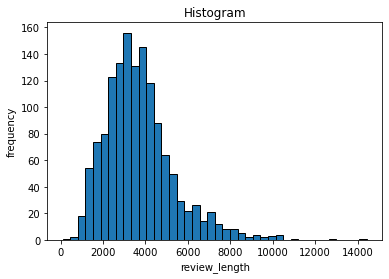

In [15]:
# vi. Plot the histogram of review lengths
plt.hist(train_set.length, bins=40, edgecolor='black')
plt.xlabel('review_length')
plt.ylabel('frequency')
plt.title('Histogram')
plt.show()

In [16]:
# viii. Select
L = np.percentile(train_set.length, 70)
train_set = train_set[train_set.length <= L].reset_index(drop=True)
print('L:', L)
train_set

L: 4221.6


,text,sentiment,length
0,films adapted from comic books have had plenty...,1,4035
1,every now and then a movie comes along from a ...,1,3885
2,youve got mail works alot better than it deser...,1,2338
3,moviemaking is a lot like being the general ma...,1,3735
4,one of my colleagues was surprised when i told...,1,3519
...,...,...,...
975,if youve seen the trailers or commercials its...,-1,1527
976,house on haunted hill starring taye diggs ...,-1,3556
977,marie couldnt talk paulie the parrot star...,-1,3599
978,well heres a distasteful thoroughly amateuri...,-1,3684


In [ ]:
# vii. represent each text (= data point)
from keras.preprocessing.text import Tokenizer

corpus = [i for i in train_set.text]
t = Tokenizer()  # Tokenizer(num_words = 5001)
t.fit_on_texts(corpus)
seq = t.texts_to_sequences(corpus)
print(seq)

In [18]:
# ix. Truncate and zero_padding
from keras.preprocessing.sequence import pad_sequences

padded_seq = pad_sequences(seq, maxlen=int(L))
padded_seq

array([[    0,     0,     0, ...,     3,  1027,  1477],
       [    0,     0,     0, ...,    10,     2,  1557],
       [    0,     0,     0, ...,     1,   663,  5606],
       ...,
       [    0,     0,     0, ..., 29599,    31,  2758],
       [    0,     0,     0, ...,   222,     7,  4183],
       [    0,     0,     0, ...,     9,    26,   200]])

## Word Embeddings  
In c.i and footnote 5, 500 must be replaced with L.

In [19]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(5000, 32, input_length=int(L))) # max_features = len(t.word_index)+1
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4221, 32)          160000    
                                                                 
 flatten (Flatten)           (None, 135072)            0         
                                                                 
Total params: 160,000
Trainable params: 160,000
Non-trainable params: 0
_________________________________________________________________


## Multi-Layer Perceptron

In [21]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, Dropout

# train
x_train = padded_seq
y_train = train_set.sentiment
y_train = y_train.astype(int)
y_train = y_train.map({-1:0, 1:1}) # turn negative label from -1 to 0, cuz there's a sigmoid func(0,1) in the end

# test
test_texts = [i for i in test_set.text]
test_seq = t.texts_to_sequences(test_texts)
x_test = pad_sequences(test_seq, maxlen=int(L))
y_test = test_set.sentiment
y_test = y_test.astype(int)
y_test = y_test.map({-1:0, 1:1})

# model
model = Sequential()
model.add(Embedding(len(t.word_index)+1, 32, input_length=int(L))) # max_features = len(t.word_index)+1
model.add(Flatten())
model.add(Dense(50, input_shape=(32*int(L),), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # output layer
# model.summary()

# fit
opt = tf.keras.optimizers.Adam(learning_rate=0.001) # default eta = 0.001
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=2, batch_size=10)

Epoch 1/2
98/98 [==============================] - 4s 38ms/step - loss: 0.7806 - accuracy: 0.5327
Epoch 2/2
98/98 [==============================] - 4s 38ms/step - loss: 0.6908 - accuracy: 0.5398


In [22]:
# evaluate
score = model.evaluate(x_test, y_test, batch_size=10)
print('test:', score)
score_train = model.evaluate(x_train, y_train, batch_size=10)
print('train:', score_train)

60/60 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.5000
test: [0.6946516633033752, 0.5]
98/98 [==============================] - 0s 5ms/step - loss: 0.6903 - accuracy: 0.5398
train: [0.6902850866317749, 0.5397959351539612]


## One-Dimensional Convolutional Neural Network

In [23]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, Dropout, Conv1D, MaxPooling1D

# train
x_train = padded_seq
y_train = train_set.sentiment
y_train = y_train.astype(int)
y_train = y_train.map({-1:0, 1:1})

# test
test_texts = [i for i in test_set.text]
test_seq = t.texts_to_sequences(test_texts)
x_test = pad_sequences(test_seq, maxlen=int(L))
y_test = test_set.sentiment
y_test = y_test.astype(int)
y_test = y_test.map({-1:0, 1:1})

# model
model = Sequential()
model.add(Embedding(len(t.word_index)+1, 32, input_length=int(L))) # max_features = len(t.word_index)+1

model.add(Conv1D(filters=32, kernel_size=3))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Flatten())

model.add(Dense(50, input_shape=(32*int(L),), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # output layer
# model.summary()

# fit
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
98/98 [==============================] - 5s 42ms/step - loss: 0.7354 - accuracy: 0.5000
Epoch 2/10
98/98 [==============================] - 4s 44ms/step - loss: 0.7194 - accuracy: 0.4857
Epoch 3/10
98/98 [==============================] - 4s 43ms/step - loss: 0.6909 - accuracy: 0.5327
Epoch 4/10
98/98 [==============================] - 4s 41ms/step - loss: 0.6769 - accuracy: 0.5337
Epoch 5/10
98/98 [==============================] - 4s 44ms/step - loss: 0.5600 - accuracy: 0.6857
Epoch 6/10
98/98 [==============================] - 4s 46ms/step - loss: 0.4371 - accuracy: 0.8398
Epoch 7/10
98/98 [==============================] - 4s 45ms/step - loss: 0.3501 - accuracy: 0.8918
Epoch 8/10
98/98 [==============================] - 4s 45ms/step - loss: 0.3096 - accuracy: 0.8959
Epoch 9/10
98/98 [==============================] - 5s 46ms/step - loss: 0.2302 - accuracy: 0.9378
Epoch 10/10
98/98 [==============================] - 5s 47ms/step - loss: 0.1513 - accuracy: 0.9684


In [24]:
# evaluate
score = model.evaluate(x_test, y_test, batch_size=10)
print('test:', score)
score_train = model.evaluate(x_train, y_train, batch_size=10)
print('train:', score_train)

60/60 [==============================] - 1s 7ms/step - loss: 0.6416 - accuracy: 0.7167
test: [0.6415811777114868, 0.7166666388511658]
98/98 [==============================] - 1s 7ms/step - loss: 0.0536 - accuracy: 1.0000
train: [0.05357464402914047, 1.0]


In [41]:
y_pred = model.predict(x_test, batch_size=10)
len(y_pred)

600

In [49]:
y_pred[60][0]

0.116662055

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4221, 32)          948096    
                                                                 
 conv1d (Conv1D)             (None, 4219, 32)          3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2109, 32)         0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 67488)             0         
                                                                 
 dense_4 (Dense)             (None, 50)                3374450   
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                      

## Long Short-Term Memory Recurrent Neural Network

In [26]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, Dropout, Conv1D, MaxPooling1D, LSTM

# train
x_train = padded_seq
y_train = train_set.sentiment
y_train = y_train.astype(int)
y_train = y_train.map({-1:0, 1:1})

# test
test_texts = [i for i in test_set.text]
test_seq = t.texts_to_sequences(test_texts)
x_test = pad_sequences(test_seq, maxlen=int(L))
y_test = test_set.sentiment
y_test = y_test.astype(int)
y_test = y_test.map({-1:0, 1:1})

# model
model_lstm = Sequential()
model_lstm.add(Embedding(len(t.word_index)+1, 32, input_length=int(L))) # max_features = len(t.word_index)+1
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(256, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation='sigmoid')) # output layer
# model_lstm.summary()

# fit
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_lstm.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
98/98 [==============================] - 143s 1s/step - loss: 0.6904 - accuracy: 0.5378
Epoch 2/10
98/98 [==============================] - 146s 1s/step - loss: 0.4950 - accuracy: 0.7786
Epoch 3/10
98/98 [==============================] - 147s 2s/step - loss: 0.0952 - accuracy: 0.9704
Epoch 4/10
98/98 [==============================] - 160s 2s/step - loss: 0.0189 - accuracy: 0.9939
Epoch 5/10
98/98 [==============================] - 154s 2s/step - loss: 0.0361 - accuracy: 0.9867
Epoch 6/10
98/98 [==============================] - 146s 1s/step - loss: 0.0075 - accuracy: 0.9990
Epoch 7/10
98/98 [==============================] - 148s 2s/step - loss: 4.6177e-04 - accuracy: 1.0000
Epoch 8/10
98/98 [==============================] - 147s 1s/step - loss: 2.2557e-04 - accuracy: 1.0000
Epoch 9/10
98/98 [==============================] - 148s 2s/step - loss: 1.3900e-04 - accuracy: 1.0000
Epoch 10/10
98/98 [==============================] - 147s 1s/step - loss: 1.0610e-04 - accuracy: 

In [27]:
# evaluate
score = model_lstm.evaluate(x_test, y_test, batch_size=10)
print('test:', score)
score_train = model_lstm.evaluate(x_train, y_train, batch_size=10)
print('train:', score_train)

60/60 [==============================] - 10s 151ms/step - loss: 1.5536 - accuracy: 0.7117
test: [1.5535694360733032, 0.7116666436195374]
98/98 [==============================] - 16s 159ms/step - loss: 5.3048e-05 - accuracy: 1.0000
train: [5.304805745254271e-05, 1.0]


I set epochs = 10, and the accuracy on train set is 1.0. So, I think if epochs is set to 50, the model may overfit.